In [1]:
# import necessary libraries
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import cv2

In [2]:
# import datasets 
train_labels = np.array(pd.read_csv("../datasets/train_labels.csv", delimiter=",", header=0, index_col=0))
train_images = np.load("../datasets/train_images.npy", encoding="latin1")
test_images = np.load("../datasets/test_images.npy", encoding="latin1")

In [3]:
# reshape images (10000 --> 100*100)
def reshape(dataset):
    output = []
    for img in dataset:
        output.append(img.reshape(100,100))
    return np.array(output, dtype=int)

In [4]:
# unravel images (100*100 --> 10000)
def unravel(dataset):
    output = []
    for img in dataset:
        output.append(img.ravel())
    return np.array(output, dtype=int)

In [5]:
def prepareToSaveNPY(dataset):
    output = []
    for i in range(len(dataset)):
        output.append((int(i), np.array(dataset[i], dtype=float)))
    return np.array(output, dtype=object)

In [6]:
# convert greyscale to binary according to threshold
def binarize(dataset, threshold):
    output = []
    for img in dataset:
        img[img < threshold] = 0
        img[img >= threshold] = 255
        output.append(img)
    return np.array(output, dtype=int)

In [7]:
# remove noise surrounding connected component i.e. supposed doodle
def denoise(dataset, connectivity):
    output = []
    for img in dataset:
        img_binary = (img > 0).astype(np.uint8)
        nb_components, labels, stats, centroids = cv2.connectedComponentsWithStats(img_binary, connectivity, cv2.CV_32S)
        areas = stats[:,-1]
        max_label = 1
        max_area = areas[1]
        for j in range(1, nb_components):
            if areas[j] > max_area:
                max_label = j
                max_area = areas[j]
        labels[labels != max_label] = 0
        output.append(labels)
    return np.array(output, dtype=int)

In [8]:
# check preprocessing results
def compare_preprocessing_img(size):
    '''
    size: number of img to compare, random select
    output: compare result
    '''
    
    plot = np.random.randint(0,10000,size)
    fig = plt.figure(figsize = (18,12))
    for i in range(len(plot)):
        
        img = train_x[plot[i]]
        pre_img = pretrain_x[plot[i]]

        label = train_labels[plot[i]]

        subplot = fig.add_subplot(size,2,2*i+1,title=label)
        subplot.imshow(img, cmap ='gray_r')
        subplot.axes.get_xaxis().set_visible(False)
        subplot.axes.get_yaxis().set_visible(False)

        subplot = fig.add_subplot(size,2,2*(i+1),title=label)
        subplot.imshow(pre_img,cmap='gray_r')
        subplot.axes.get_xaxis().set_visible(False)
        subplot.axes.get_yaxis().set_visible(False)

    plt.show()

In [9]:
# preprocess datasets of images
train_x = reshape(train_images[:,1])
pretrain_x = train_x
train_x = binarize(train_x, 100)
train_x = denoise(train_x, 8)
test_x = reshape(test_images[:,1])
test_x = binarize(test_x, 100)
test_x = denoise(test_x, 8)

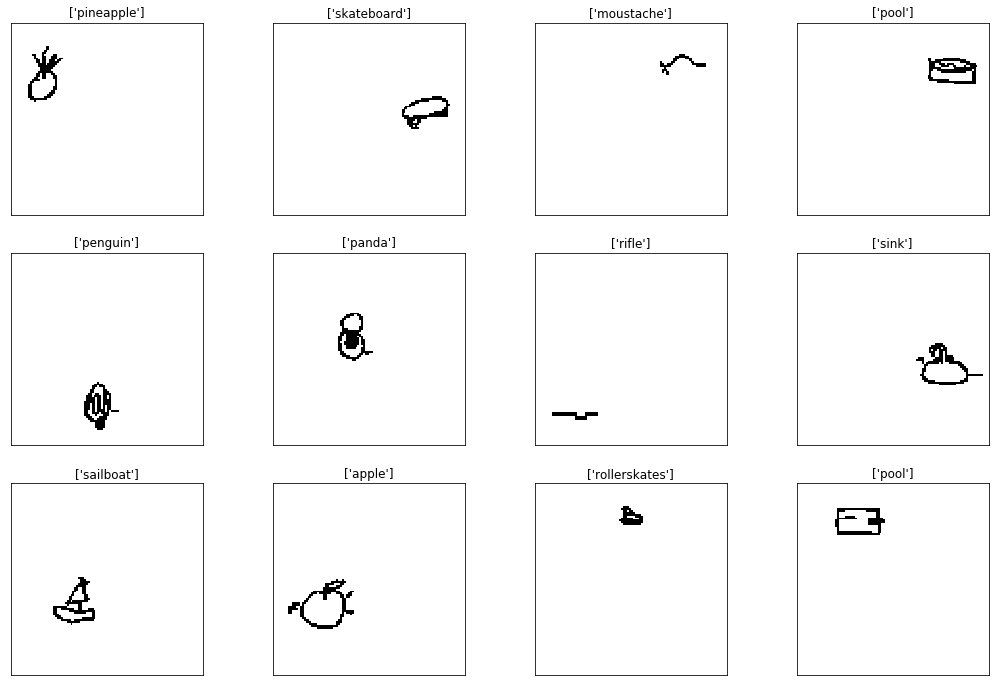

In [10]:
# check preprocessing results
plot = [67,150,250,350,450,650,750,850,950,1050,1150,1250]
fig = plt.figure(figsize = (18,12))
for i in range(len(plot)):
    img = train_x[plot[i]]
    label = train_labels[plot[i]]
    subplot = fig.add_subplot(3,4,i+1)
    subplot.imshow(img, cmap ='gray_r')
    plt.title(label)
    subplot.axes.get_xaxis().set_visible(False)
    subplot.axes.get_yaxis().set_visible(False)
plt.show()

In [11]:
np.save("datasets/preprocessed_train_images.npy", prepareToSaveNPY(unravel(train_x)))
np.save("datasets/preprocessed_test_images.npy", prepareToSaveNPY(unravel(test_x)))

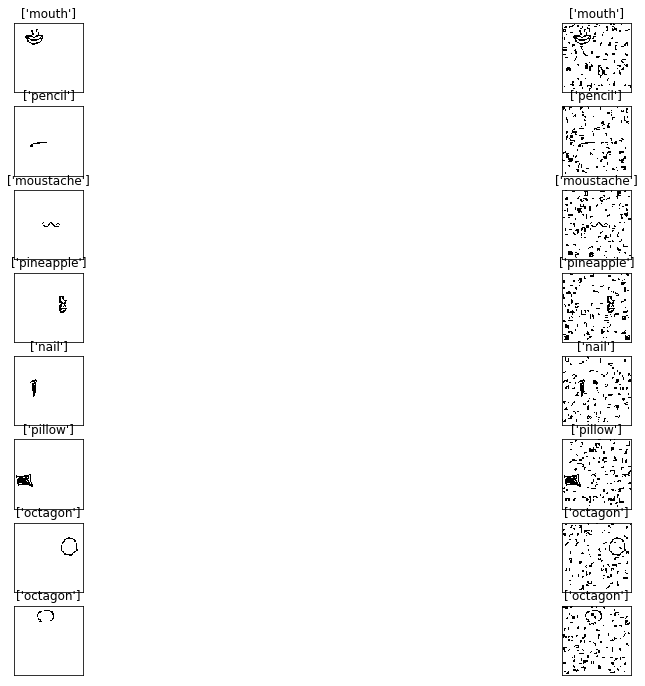

In [15]:
compare_preprocessing_img(8)